In [8]:
import os
import numpy as np
import pandas as pd

path=r'D:\result\custom_48_48_Autoformer_Custom_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_test_0\data'
filelist=os.listdir(path)
print(filelist) 
true_datapath=os.path.join(path,filelist[3])
true = np.load(true_datapath)

pred_datapath=os.path.join(path,filelist[2])
pred = np.load(pred_datapath)

true.shape


['0.pdf', 'metrics.npy', 'pred.npy', 'true.npy']


(6, 24, 16)

In [22]:
# get current time
import time
import datetime
now = int(time.time())
timeArray = time.localtime(now)
currentTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
print(currentTime)

2024-05-04 16:51:26


In [21]:
name='custom_48_48_Informer_Custom_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_test_0'
name=str(name.split('_')[-2]+'_'+name.split('_')[-1])
name

'test_0'

In [12]:
def MAE(pred, true):
    return np.mean(np.abs(pred - true))


def MSE(pred, true):
    return np.mean((pred - true) ** 2)


def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))



mae = MAE(pred, true)
mse = MSE(pred, true)
rmse = RMSE(pred, true)
print(mae, mse, rmse,)

0.59370637 0.683154 0.8265313


In [36]:
path=r'D:\studydata\Masterarbeit\lian333\transformer_all\Data\ETT\Wurzburg.csv'
import pandas as pd
data = pd.read_csv(path)
data.shape

(250500, 18)

In [24]:
len_true=1445916
len=244087
batch_size=2
seq_len=115673
pred_len=86400
encode_lane=57836
dataset=len_true*0.2-seq_len-pred_len+1
print(int(dataset//batch_size))
print(dataset)
print('test_batch',dataset//pred_len)

43555
87111.20000000001
test_batch 1.0


In [5]:
dataset=len*0.2-seq_len-pred_len+1
dataset=2*pred_len
seq_len=2*pred_len
len_true=1445916


25000.0

In [21]:
int(115673/25000)

4

In [ ]:
50100-2*pred_len+1=2*pred_len

In [56]:
for i in range(0, pred_len*2, pred_len):
    print(i)

0
25000


# My Data

In [80]:
import pandas as pd
import json
part=pd.read_csv('Data\part2_100000_200000.csv')
f=open('important_features.json')
feature = json.load(f) 
important=feature[:10]

part['Date'] = pd.to_datetime(part['Timestamp'], unit='s')
part['Date']=part.Date.dt.strftime('%Y-%m-%d %H:%M:%S')
part['Time'] = pd.date_range(start='2021-02-12 14:26:40', periods=part.shape[0], freq='S')
part['Time']=part.Time.dt.strftime('%Y-%m-%d %H:%M:%S')

#set 'Time' as index
part = part.set_index('Time')
all_data=part[important]
all_data.head()


,Standardabweichung_y,Variance_z,Variance_y,Standardabweichung_z,Effektivwert_x,Mittlere_Absolute_Abweichung_y,Effektivwert_y,Standardabweichung_x,Mittelwert_x,Variance_x
Time,,,,,,,,,,
2021-02-12 14:26:40,194.290,300103,37786.3,547.542,421.507,168.181,430.811,336.610,-253.696,113420.0
2021-02-12 14:26:41,187.558,251653,35213.3,501.399,426.146,162.307,407.917,342.401,-253.696,117356.0
2021-02-12 14:26:42,187.221,268792,35086.6,518.193,418.621,163.119,419.403,328.824,-259.072,108233.0
2021-02-12 14:26:43,177.010,279167,31363.9,528.098,423.678,151.958,388.749,331.830,-263.424,110221.0
2021-02-12 14:26:44,179.179,241332,32137.2,491.010,410.399,157.922,413.105,319.947,-257.024,102469.0


In [2]:
import pandas as pd
import json
part=pd.read_csv(r'D:\studydata\Masterarbeit\lian333\transformer_all\Data\ETT\Wurzburg.csv')

In [3]:
len(part)

250500

In [84]:
import torch

torch.cuda.is_available()

True

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator


In [ ]:

# conda install python=<版本号>
# pip install pydantic==1.10.11
# conda install -n final ipykernel --update-deps --force-reinstall


In [2]:
import pandas as pd
import json
import numpy as np
part=pd.read_csv('./Data/ETT/all_data_axis1.csv')
part.drop_duplicates(subset=[part.columns[0]], inplace=True)
print(part.shape)
f=open('./Data/ETT/feature_important_axis1.json')
feature = json.load(f) 
important=feature[:10]


all_data=part[important]
all_data.head()
for feature in important:
    print(len(np.unique(all_data[feature])))


(1771047, 31)
10790
33
232355
4303
28
30944
15998
260334
4904
239783


In [20]:
import pandas as pd
import json
import numpy as np

part=pd.read_csv('./Data/ETT/all_data_axis2.csv')
f=open('./Data/ETT/feature_important_axis2.json')
feature = json.load(f) 
important=feature[:10]
print(important)

all_data=part[important]
all_data.head()
for feature in important:
    print(len(np.unique(all_data[feature])))


['Median_z', 'Mittelwert_x', 'Effektivwert_z', 'Mittelwert_z', 'Variance_z', 'Effektivwert_y', 'Standardabweichung_x', 'Standardabweichung_z', 'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_z']
11
3365
11149
2570
303602
15825
189974
276542
202264
246787


In [21]:
import pandas as pd
import json
import numpy as np

# 加载数据
part = pd.read_csv('./Data/ETT/all_data_axis2.csv')
with open('./Data/ETT/feature_important_axis2.json') as f:
    feature = json.load(f)

important = feature[:10]
print(important)

all_data = part[important]
print(all_data.head())

# 打印每个特征的唯一值数量和数据类型
for feature in important:
    unique_values = np.unique(all_data[feature])
    print(f"{feature} - Unique values: {len(unique_values)}, Data type: {all_data[feature].dtype}")

# 检查 Median_z 的分布和唯一值
print(f"Median_z unique values: {np.unique(all_data['Median_z'])}")
print(f"Median_z data type: {all_data['Median_z'].dtype}")


['Median_z', 'Mittelwert_x', 'Effektivwert_z', 'Mittelwert_z', 'Variance_z', 'Effektivwert_y', 'Standardabweichung_x', 'Standardabweichung_z', 'Mittlere_Absolute_Abweichung_x', 'Mittlere_Absolute_Abweichung_z']
   Median_z  Mittelwert_x  Effektivwert_z  Mittelwert_z  Variance_z  \
0     15872       569.600         15896.6       15889.7      220962   
1     15872       545.792         15887.1       15879.7      235057   
2     15872       565.248         15893.9       15885.8      256573   
3     15872       566.784         15927.7       15920.1      241982   
4     15872       567.040         15925.5       15917.1      268509   

   Effektivwert_y  Standardabweichung_x  Standardabweichung_z  \
0         571.115               328.477               469.831   
1         571.746               309.810               484.584   
2         566.507               324.498               506.277   
3         568.931               325.453               491.670   
4         586.402               339.6

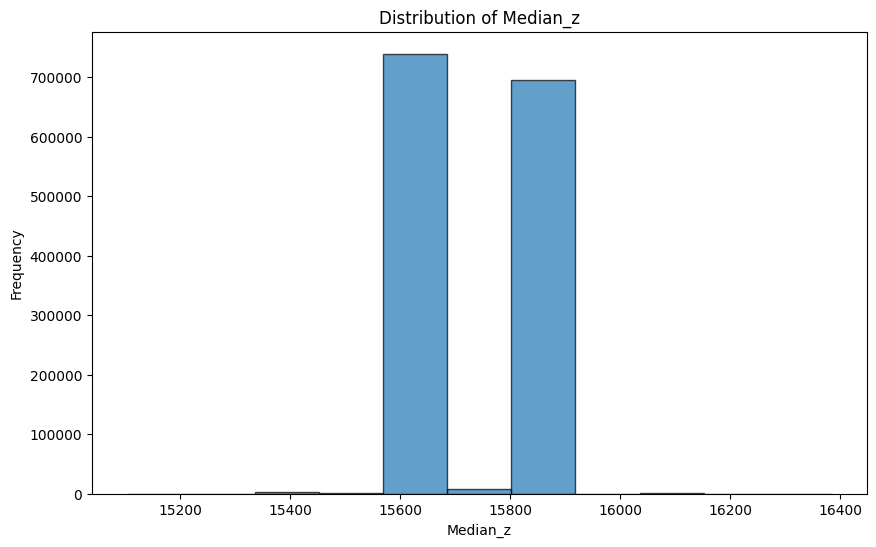

In [22]:
import matplotlib.pyplot as plt

# 绘制 Median_z 的分布图
plt.figure(figsize=(10, 6))
plt.hist(all_data['Median_z'], bins=11, edgecolor='k', alpha=0.7)
plt.title('Distribution of Median_z')
plt.xlabel('Median_z')
plt.ylabel('Frequency')
plt.show()


In [23]:
# 计算相关矩阵
correlation_matrix = all_data.corr()

# 打印 Median_z 与其他特征的相关性
print(correlation_matrix['Median_z'])


Median_z                          1.000000
Mittelwert_x                      0.697928
Effektivwert_z                    0.612961
Mittelwert_z                      0.821622
Variance_z                       -0.075718
Effektivwert_y                   -0.068887
Standardabweichung_x             -0.200987
Standardabweichung_z             -0.173136
Mittlere_Absolute_Abweichung_x   -0.194415
Mittlere_Absolute_Abweichung_z   -0.163990
Name: Median_z, dtype: float64


Median_z                          1.000000
Mittelwert_x                      0.697928
Effektivwert_z                    0.612961
Mittelwert_z                      0.821622
Variance_z                       -0.075718
Effektivwert_y                   -0.068887
Standardabweichung_x             -0.200987
Standardabweichung_z             -0.173136
Mittlere_Absolute_Abweichung_x   -0.194415
Mittlere_Absolute_Abweichung_z   -0.163990
Name: Median_z, dtype: float64


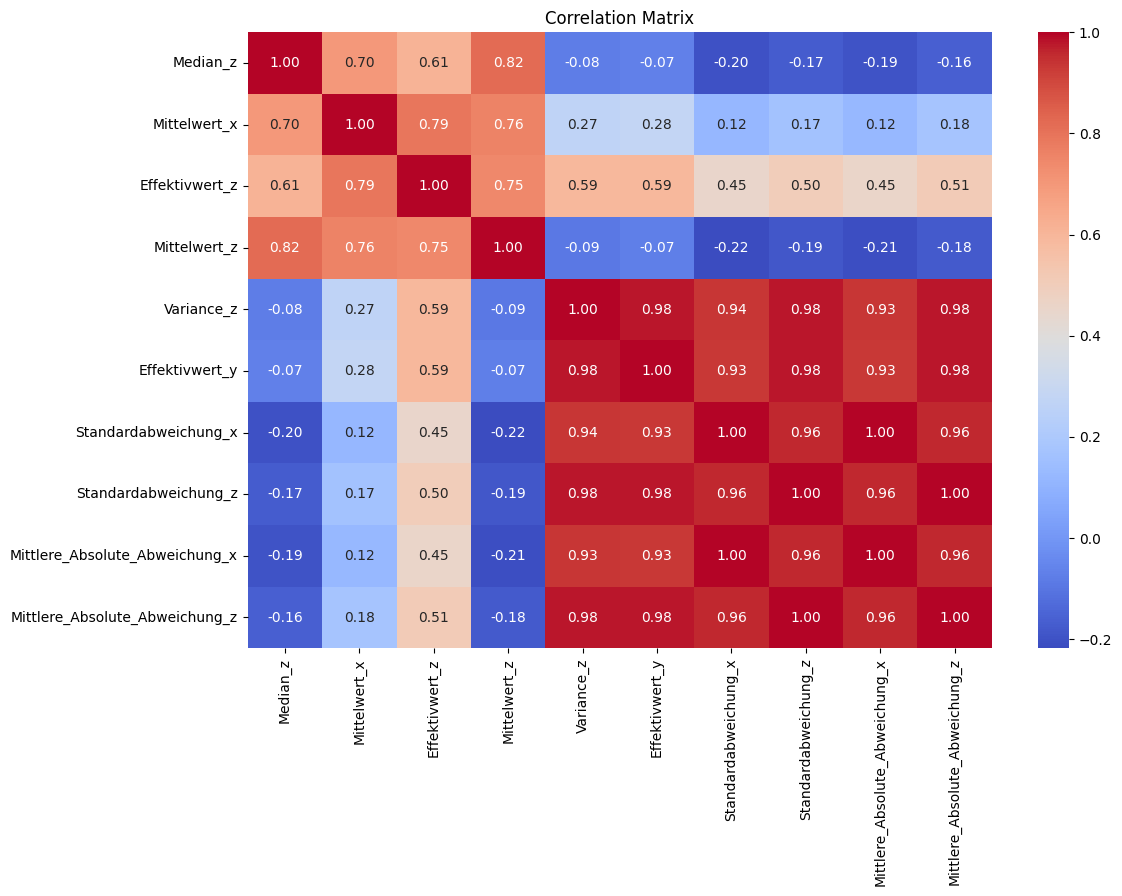

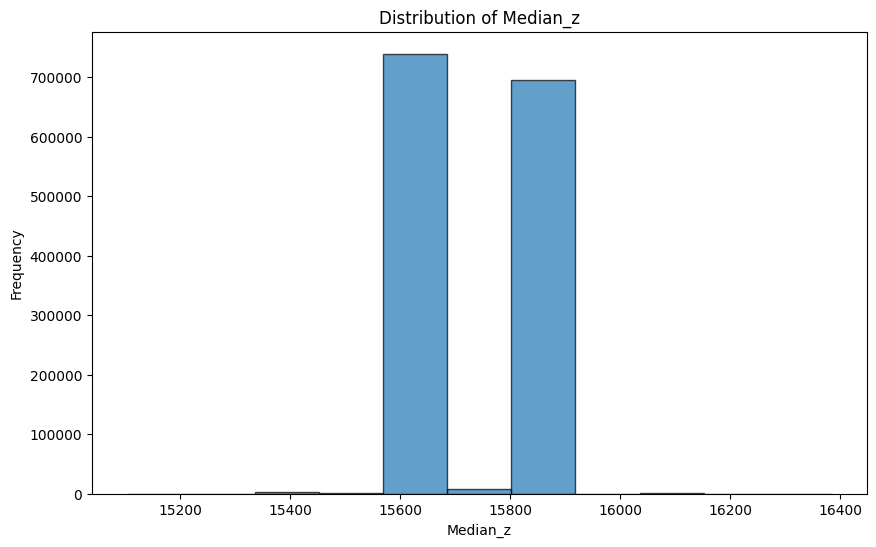

In [24]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
part = pd.read_csv('./Data/ETT/all_data_axis2.csv')
with open('./Data/ETT/feature_important_axis2.json') as f:
    feature = json.load(f)

important = feature[:10]
all_data = part[important]

# 计算相关矩阵
correlation_matrix = all_data.corr()

# 打印 Median_z 与其他特征的相关性
print(correlation_matrix['Median_z'])

# 绘制相关矩阵的热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 绘制 Median_z 的分布图
plt.figure(figsize=(10, 6))
plt.hist(all_data['Median_z'], bins=11, edgecolor='k', alpha=0.7)
plt.title('Distribution of Median_z')
plt.xlabel('Median_z')
plt.ylabel('Frequency')
plt.show()
